# ML - Task 
## Measures of Descriptive statistics-Central Tendency, spread
<p>You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:</p>
<p>Detect the outliers and remove it using:</p>

<ol>
<li>Mean Function</li>
<li>Percentile method</li>
<li>IQR(Inter quartile range method)</li>
<li>Normal distribution</li>
<li>Zscore method</li>
</ol>
<p>Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))</p>
<p>Check the correlation between all the numerical columns and plot heatmap.</p>
<p>Scatter plot between the variables to check the correlation between them.</p>

 # Outliers Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df= pd.read_csv('C:\\Users\\hp\\Downloads\\house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.describe(include="all")

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [8]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0               

In [11]:
df.duplicated().sum()

1049

<p>So here duplicate rows we have.So we need to remove it.</p>

In [2]:
df= pd.read_csv('C:\\Users\\hp\\Downloads\\house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [13]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [16]:
df.isnull

<bound method DataFrame.isnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
12146         Green Glen Layout      3 BHK      1715.0     3  112.00    3   
12147                Whitefield  5 Bedroom      3453.0     4  231.00    5   
12148                     other      4 BHK      3600.0     5  400.00    4   
12149     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
12150           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   

       price_per_sqft  
0                

In [17]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
12146         Green Glen Layout      3 BHK      1715.0     3  112.00    3   
12147                Whitefield  5 Bedroom      3453.0     4  231.00    5   
12148                     other      4 BHK      3600.0     5  400.00    4   
12149     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
12150           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   

       price_per_sqft  
0               

In [18]:
df.shape

(12151, 7)

# 1.Mean Function

In [19]:
df.price_per_sqft.min()

267

In [20]:
df.price_per_sqft.max()

12000000

In [21]:
df.price_per_sqft.mean()

8132.641840177763

In [22]:
df.price_per_sqft.median()

5500.0

<p><b>Here there is a difference between mean & median.So Outliers exists here.</b></p>

C:\Users\hp\AppData\Local\Temp\ipykernel_11712\2779792715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

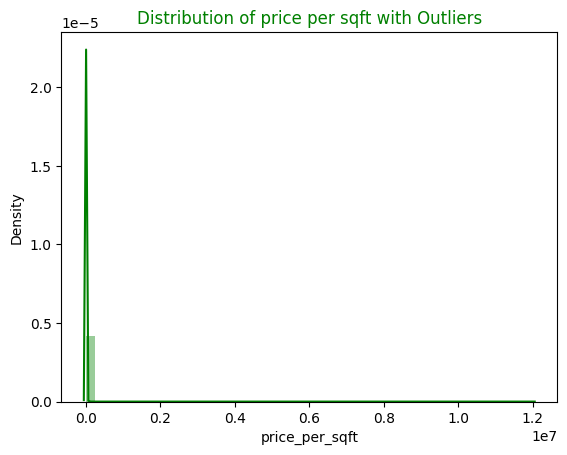

In [23]:
sns.distplot(df['price_per_sqft'],color='g')
plt.title('Distribution of price per sqft with Outliers',color='g')

<Axes: ylabel='price_per_sqft'>

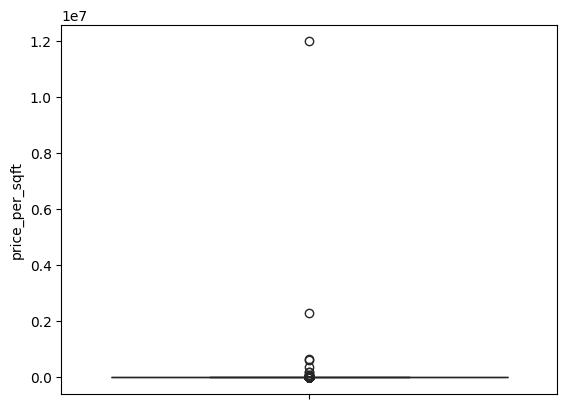

In [26]:
sns.boxplot(df['price_per_sqft'],color='g')

#### Quantile() to find out the percentiles.

In [27]:
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])


0.05     3150.0
0.10     3513.0
0.25     4312.0
0.50     5500.0
0.75     7461.0
0.90    11904.0
0.92    13129.0
0.94    14695.0
0.96    16666.0
0.98    20000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

Here a significant variation between 98 & 99 percentile,this indicate a presence of outliers.

In [28]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)] #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1,130.0,2,16250
69,other,3 Bedroom,500.0,3,100.0,3,20000
...,...,...,...,...,...,...,...
12047,other,6 Bedroom,8000.0,6,2800.0,6,35000
12062,other,1 BHK,250.0,2,40.0,1,16000
12102,other,3 Bedroom,2000.0,2,360.0,3,18000
12103,other,2 BHK,1140.0,1,185.0,2,16228


In [29]:
#Data without outliers
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


C:\Users\hp\AppData\Local\Temp\ipykernel_11712\2385713922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='b')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

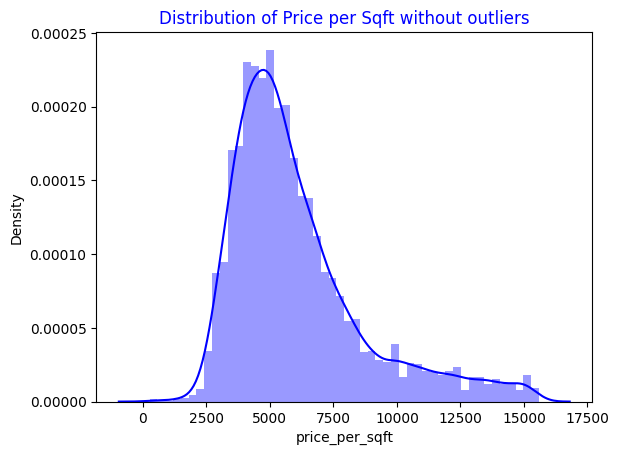

In [31]:
sns.distplot(df1['price_per_sqft'],color='b')
plt.title('Distribution of Price per Sqft without outliers',color='b')

<Axes: ylabel='price_per_sqft'>

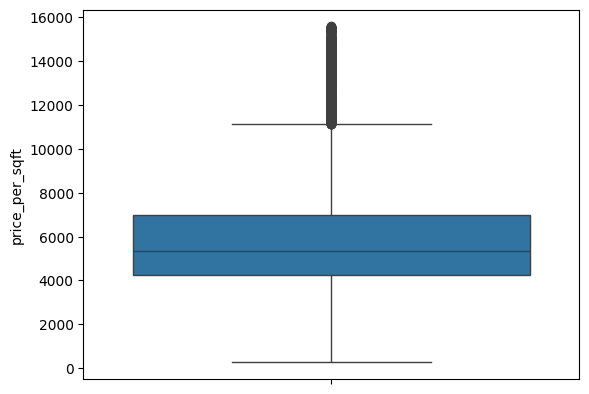

In [32]:
sns.boxplot(df1['price_per_sqft'])

In [33]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df1))
print("Outliers:",len(df)-len(df1))

Before removing outliers: 12151
After removing outliers: 11542
Outliers: 609


<b>After removing the ouliers using the mean function,we have achieved a bell shaped curve in the distplot, and we have removed 609 ouliers from the dataset.</b>

## 2.PERCENTILE METHOD

In [34]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [35]:
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15600.0
Lower Limit: 3150.0


C:\Users\hp\AppData\Local\Temp\ipykernel_11712\3611621828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

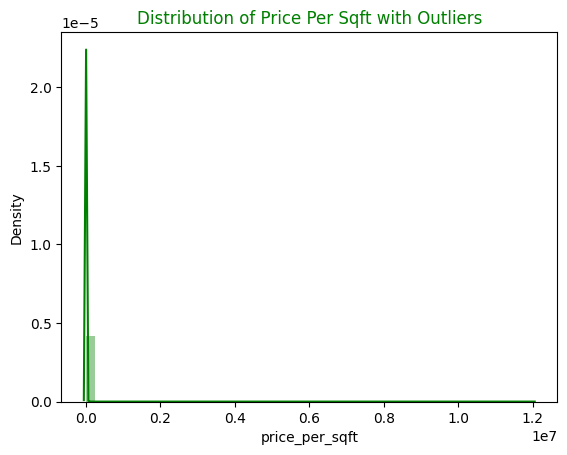

In [36]:
sns.distplot(df['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft with Outliers',color='g')

<Axes: ylabel='price_per_sqft'>

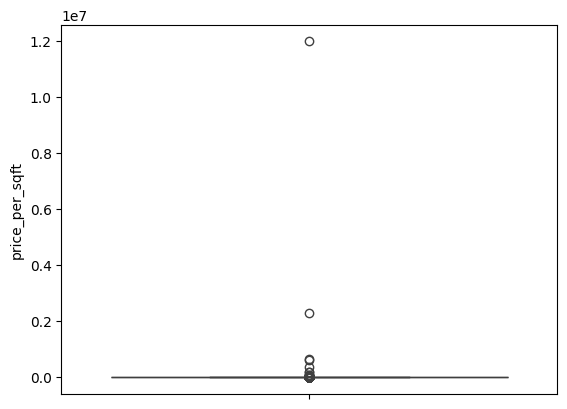

In [37]:
sns.boxplot(df['price_per_sqft'])


In [38]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.00,4,18181
9,other,6 Bedroom,1020.0,6,370.00,6,36274
20,Kengeri,1 BHK,600.0,1,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9,200.00,8,33333
...,...,...,...,...,...,...,...
12083,Electronic City Phase II,3 BHK,1651.0,3,49.53,3,3000
12102,other,3 Bedroom,2000.0,2,360.00,3,18000
12103,other,2 BHK,1140.0,1,185.00,2,16228
12114,Kothannur,4 Bedroom,1600.0,4,45.00,4,2812


In [39]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [40]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 12151
After removing outliers: 10940
Outliers: 1211


<p><b>Here we reach a conclusion that 1211 outliers are find after the percentile method.</b></p>

C:\Users\hp\AppData\Local\Temp\ipykernel_11712\3210865192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='brown')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

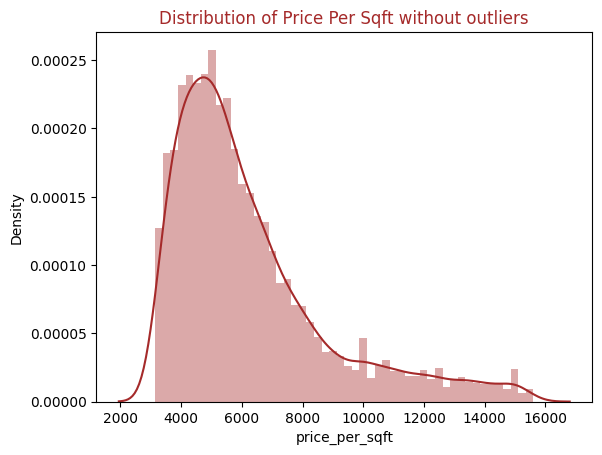

In [41]:
sns.distplot(df2['price_per_sqft'],color='brown')
plt.title('Distribution of Price Per Sqft without outliers',color='brown')

<Axes: ylabel='price_per_sqft'>

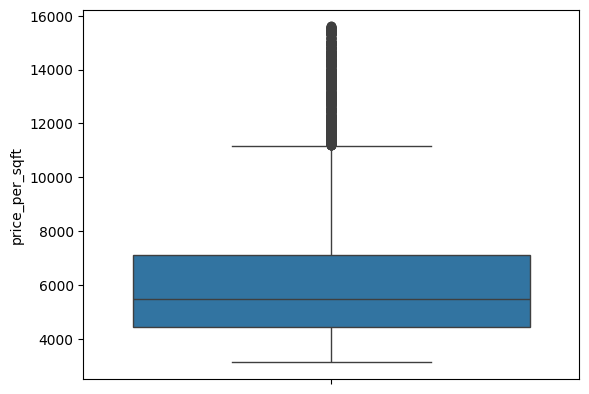

In [42]:
sns.boxplot(df2['price_per_sqft'])

In [43]:
#CAPPING -cahne the outliers to upper or lower values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

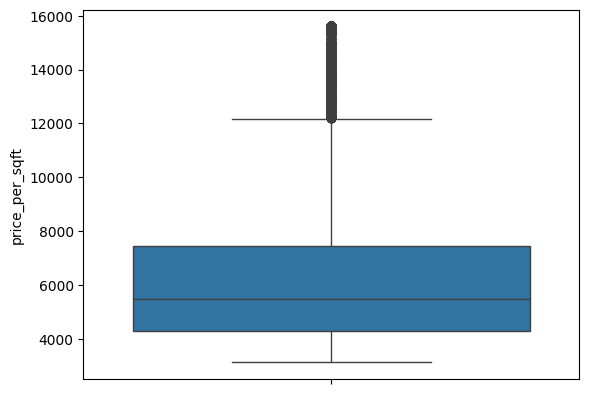

In [44]:
sns.boxplot(new_df2['price_per_sqft'])


## 3.IQR METHOD

C:\Users\hp\AppData\Local\Temp\ipykernel_11712\373823651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price Per Sqft with outliers')

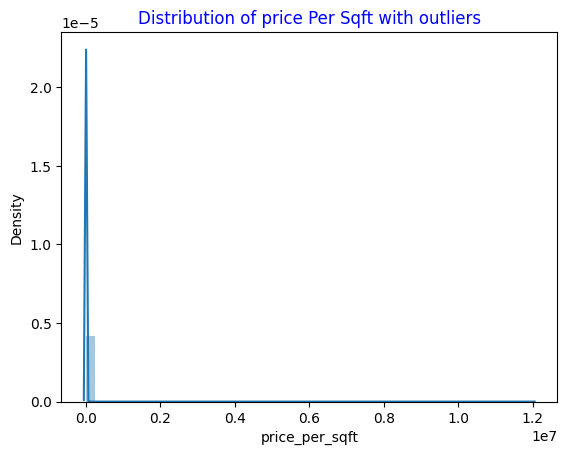

In [45]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of price Per Sqft with outliers',color='b')

<Axes: ylabel='price_per_sqft'>

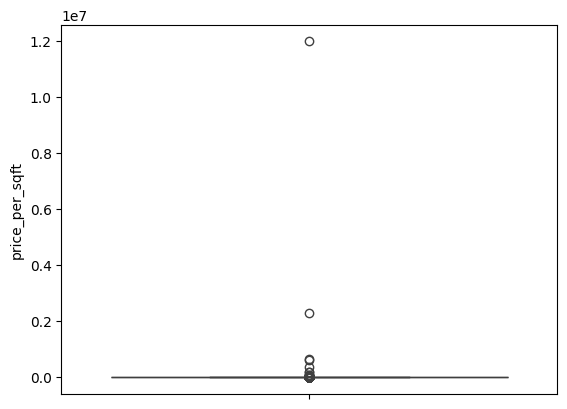

In [46]:
sns.boxplot(df['price_per_sqft'])


In [47]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4312.0
Q3= 7461.0
IQR= 3149.0


In [49]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)

Lower Whisker= -411.5
Upper Whisker= 12184.5


In [50]:
#finding otuliers
df[(df.price_per_sqft<-411.5) | (df.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1,130.0,2,16250
...,...,...,...,...,...,...,...
12077,other,3 BHK,1903.0,2,293.0,3,15396
12102,other,3 Bedroom,2000.0,2,360.0,3,18000
12103,other,2 BHK,1140.0,1,185.0,2,16228
12116,other,7 Bedroom,1400.0,7,218.0,7,15571


In [51]:
#df without outliers
df3=df[(df.price_per_sqft>-411.5) & (df.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [52]:
print('Before removing outliers:',len(df))
print('After removing outliers',len(df3))
print('Outliers:',len(df)-len(df3))

Before removing outliers: 12151
After removing outliers 11009
Outliers: 1142


C:\Users\hp\AppData\Local\Temp\ipykernel_11712\1727763733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='y')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

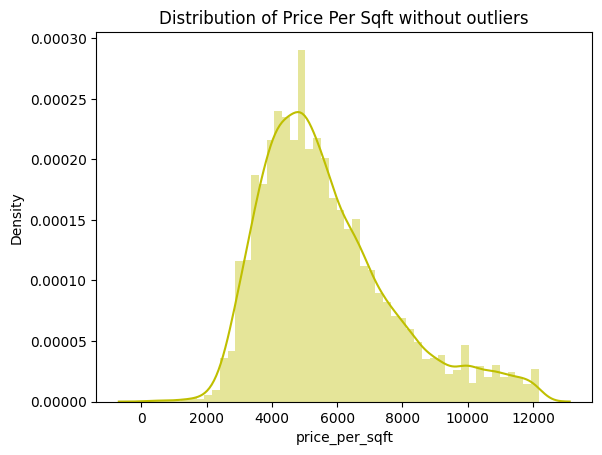

In [53]:
sns.distplot(df3['price_per_sqft'],color='y')
plt.title('Distribution of Price Per Sqft without outliers')

<Axes: ylabel='price_per_sqft'>

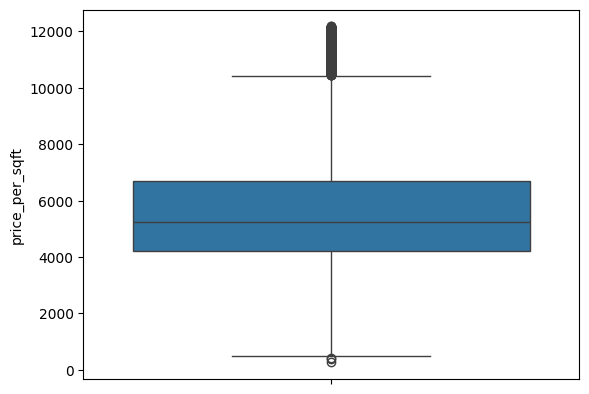

In [54]:
sns.boxplot(df3['price_per_sqft'])


<p>Using IQR method for eliminating the outliers,we get a bell shaped curve in the distplot and removed 1142 outliers from the dataset.</p>

## 4.NORMAL DISTRIBUTION


In [3]:
df.price_per_sqft.describe()


count    1.215100e+04
mean     8.132642e+03
std      1.112329e+05
min      2.670000e+02
25%      4.312000e+03
50%      5.500000e+03
75%      7.461000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [4]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [5]:
sd=df.price_per_sqft.std()
sd

111232.90089570847

In [8]:
#-3sigma
mean-3*sd

-325566.06084694766

In [9]:
#+3sigma
mean+3*sd

341831.3445273032

In [10]:
#finding outliers
df[(df.price_per_sqft<-325566.06084694766) | (df.price_per_sqft>341831.3445273032)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
344,other,3 Bedroom,11.0,3,74.0,3,672727
1098,other,5 Bedroom,24.0,2,150.0,5,625000
3920,Sarjapur Road,4 Bedroom,1.0,4,120.0,4,12000000
4744,other,7 BHK,5.0,7,115.0,7,2300000
10632,Whitefield,4 Bedroom,60.0,4,218.0,4,363333


In [11]:
#data without outliers
df4=df[(df.price_per_sqft>-325566.06084694766) & (df.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [12]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before removing outliers: 12151
After removing outliers: 12146
Outliers: 5


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\3581193206.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='y')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

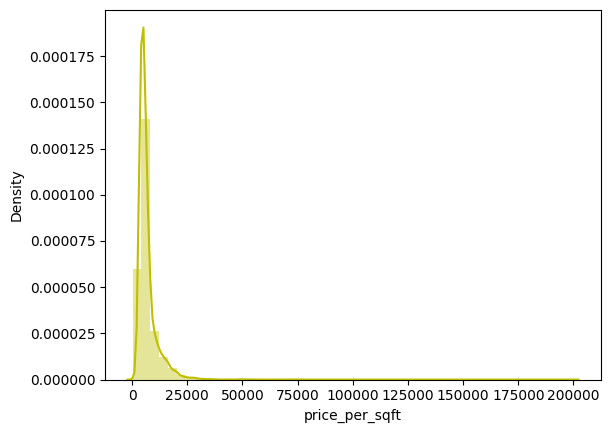

In [14]:
sns.distplot(df4['price_per_sqft'],color='y')


<Axes: ylabel='price_per_sqft'>

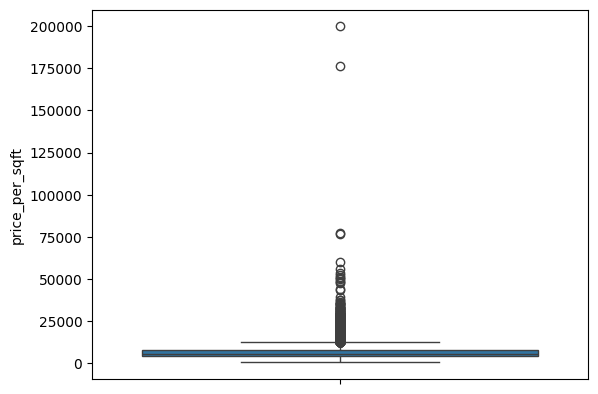

In [15]:
sns.boxplot(df4['price_per_sqft'])


<p>When need to remove the outliers,using the Normal Distributon Method.Intitially we have 12151 rows,after removing outliers we have 12146 rows in it.
We found the outliers as <i>"5"</i>.</p>



## 5.ZSCORE METHOD

In [16]:
mean=df.price_per_sqft.mean()
mean

8132.641840177763

In [17]:
sd=df.price_per_sqft.std()
sd

111232.90089570847

In [18]:
lower_limit=mean-3*sd
lower_limit

-325566.06084694766

In [20]:
upper_limit=mean+3*sd
upper_limit

341831.3445273032

In [21]:
#data without outliers
df5=df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [22]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df5))
print("Outliers:",len(df)-len(df5))

Before Removing Outliers: 12151
After Removing Outliers: 12146
Outliers: 5


C:\Users\hp\AppData\Local\Temp\ipykernel_12592\321367063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='b')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

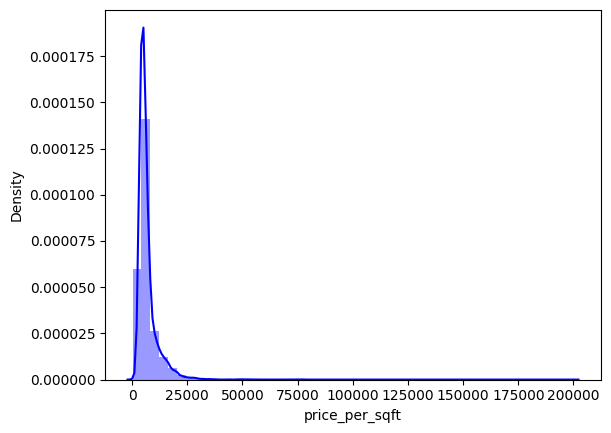

In [23]:
sns.distplot(df5['price_per_sqft'],color='b')


<Axes: ylabel='price_per_sqft'>

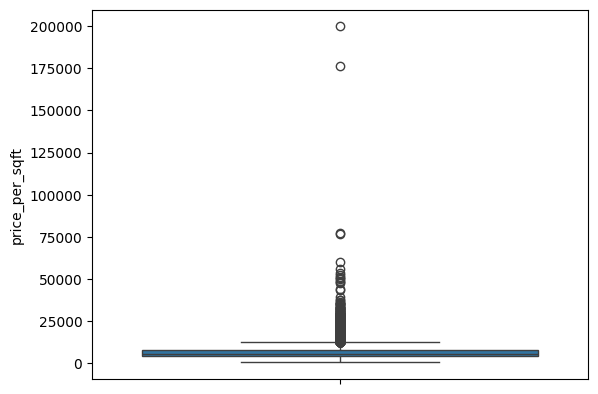

In [24]:
sns.boxplot(df5['price_per_sqft'])


<p>Using the zscore method, there were 12,151 data rows before removing outliers, and 12,146 data rows after removal, indicating a total of 5 outliers.</p>
<p>We identified the same outliers using both the normal distribution and z-score method, indicating we follows same process in our outlier removal.</p>


 ## CORRELATION BETWEEN ALL NUMERICAL COLUMNS


In [26]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
12146,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
12147,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
12148,other,4 BHK,3600.0,5,400.00,4,11111
12149,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [27]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [28]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()

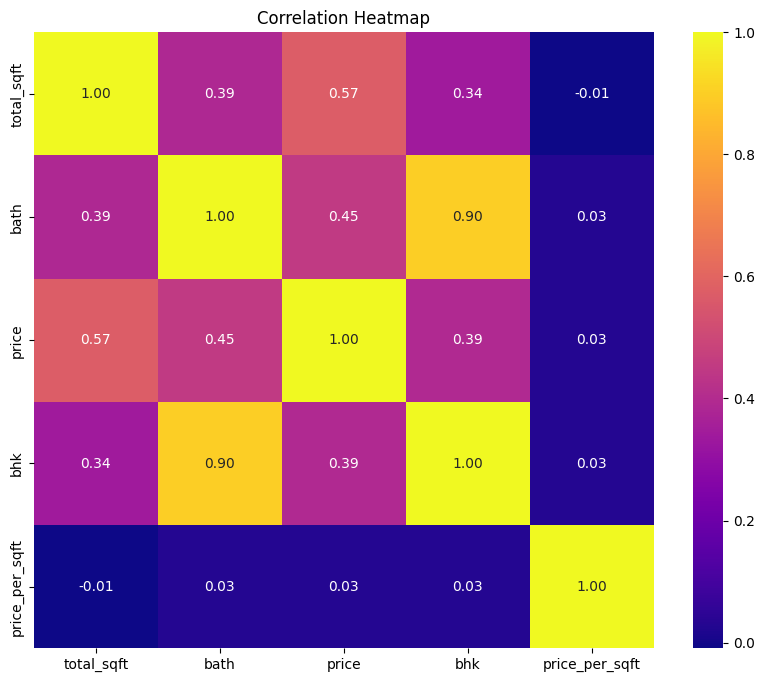

In [29]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<ul>
<li>Firstly,  there is a weak negative correlation <b>"-0.01"</b> between total_Sqft and price_per_sqft,there's almost <u>no linear relationship</u> between these two variables.</li>

<li>However, Total Sqft shows <u>moderate positive correlations</u> with other key variables such as bhk <b>"0.34"</b>, price <b>"0.57"</b>, and bath <b>"0.39"</b>, indicating that as the total square feet increases, the number of bedrooms, the property price, and the number of bathrooms tend to increase as well, though not in a perfectly linear manner.</li>

<li>Bath exhibits a <u>strong positive correlation</u> <b>"0.90"</b> with BHK, suggesting a strong linear relationship between the number of bathrooms and the number of bedrooms. Additionally, Bath also demonstrates <u>moderate positive correlations</u> with price <b>"0.45"</b> and total_sqft <b>"0.39"</b>, indicating that properties with more bathrooms tend to command higher prices and have larger square feet.</li>

<li>Price also exhibits <u>moderate positive correlations</u> with bhk <b>"0.39"</b> and total_sqft <b>"0.57"</b>, indicating that both the number of bedrooms and the total square footage have a positive impact on property prices, though again, not in a perfectly linear manner.</li>

<li>Overall, these correlation coefficients provide valuable insights into how different factors are interrelated within our dataset, aiding in better understanding and potentially predicting property prices based on their characteristics.</li>
</ul>

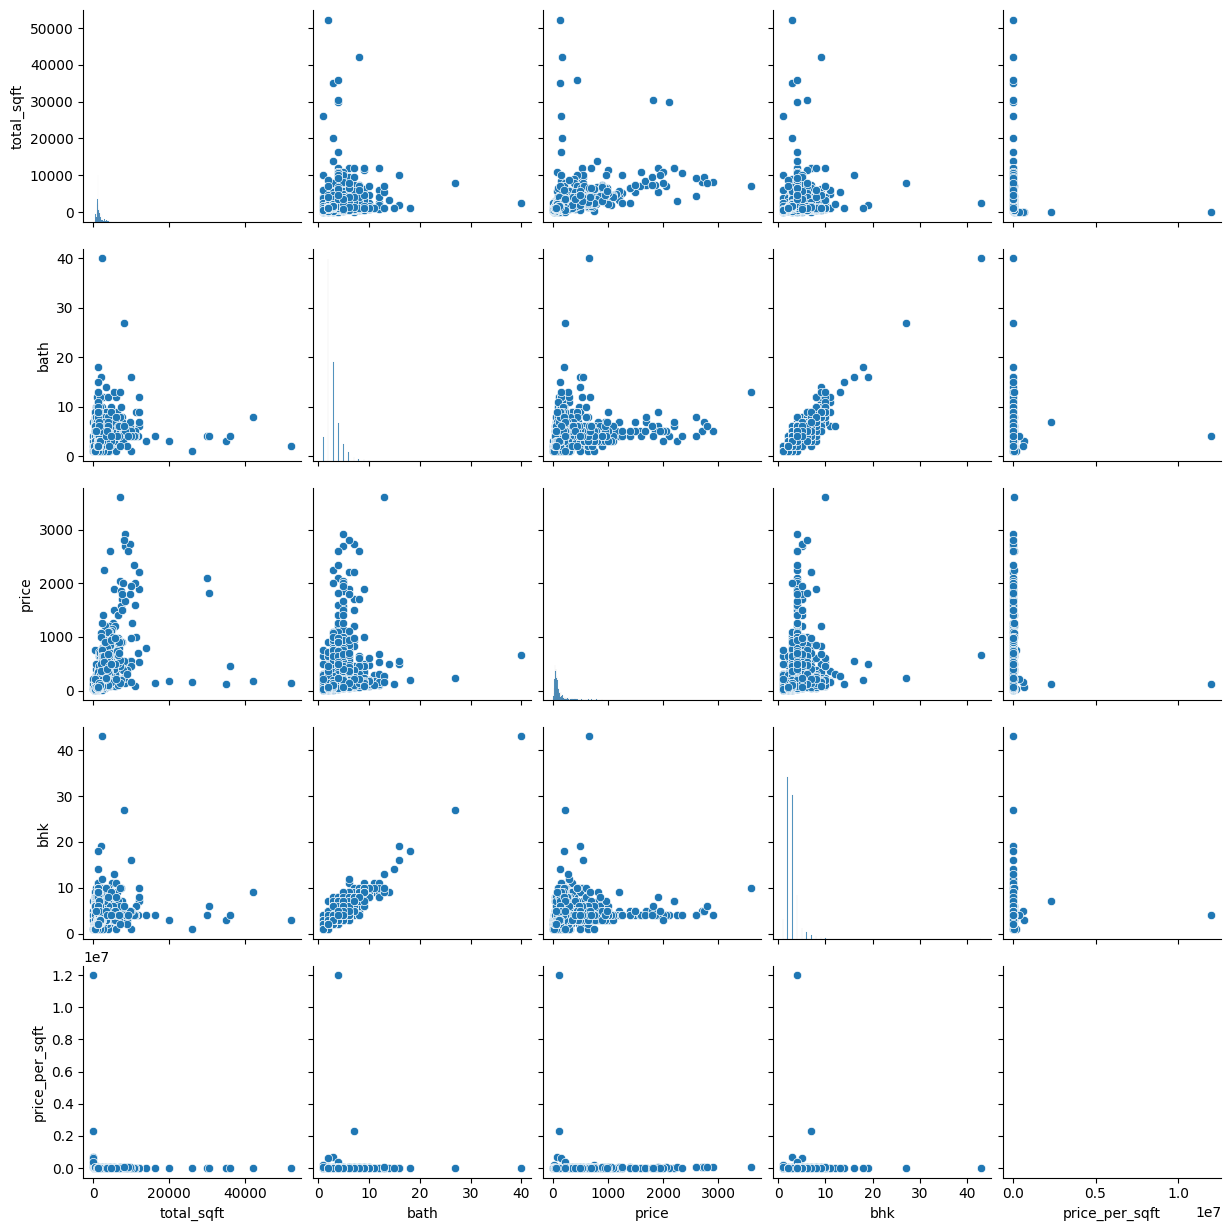

In [30]:
#plot scatterplot
sns.pairplot(df)
plt.show()